In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.dtypes

Age                   float64
Gender                 object
Education               int64
Introversion Score    float64
Sensing Score         float64
Thinking Score        float64
Judging Score         float64
Interest               object
Personality            object
dtype: object

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,128061.0,26.349091,4.908022,18.00000,23.000000,25.000000,29.000000,57.000000
Education,128061.0,0.411156,0.492045,0.00000,0.000000,0.000000,1.000000,1.000000
Introversion Score,128061.0,4.996387,2.888636,0.00004,2.490710,4.993640,7.500170,9.999990
Sensing Score,128061.0,5.081893,1.183236,0.00000,4.315659,5.124169,5.892288,9.788815
Thinking Score,128061.0,4.988040,2.886018,0.00005,2.488630,4.984180,7.492550,9.999970
Judging Score,128061.0,4.578293,1.391582,0.00000,3.709353,4.690653,5.561229,9.840494


In [5]:
df.isnull().sum()

Age                   0
Gender                0
Education             0
Introversion Score    0
Sensing Score         0
Thinking Score        0
Judging Score         0
Interest              0
Personality           0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.groupby("Personality").count()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest
Personality,,,,,,,,
ENFJ,3883,3883,3883,3883,3883,3883,3883,3883
ENFP,34404,34404,34404,34404,34404,34404,34404,34404
ENTJ,2783,2783,2783,2783,2783,2783,2783,2783
ENTP,24718,24718,24718,24718,24718,24718,24718,24718
ESFJ,554,554,554,554,554,554,554,554
ESFP,4832,4832,4832,4832,4832,4832,4832,4832
ESTJ,392,392,392,392,392,392,392,392
ESTP,3334,3334,3334,3334,3334,3334,3334,3334
INFJ,2919,2919,2919,2919,2919,2919,2919,2919


In [8]:
df.shape

(128061, 9)

#   Visualisation

In [9]:
#   personality-types on education distplot
#   distribution of personalities bar? / hist?
#   scores-distribution on one personality type (x3) hist / boxplot

<Axes: xlabel='Personality', ylabel='Count'>

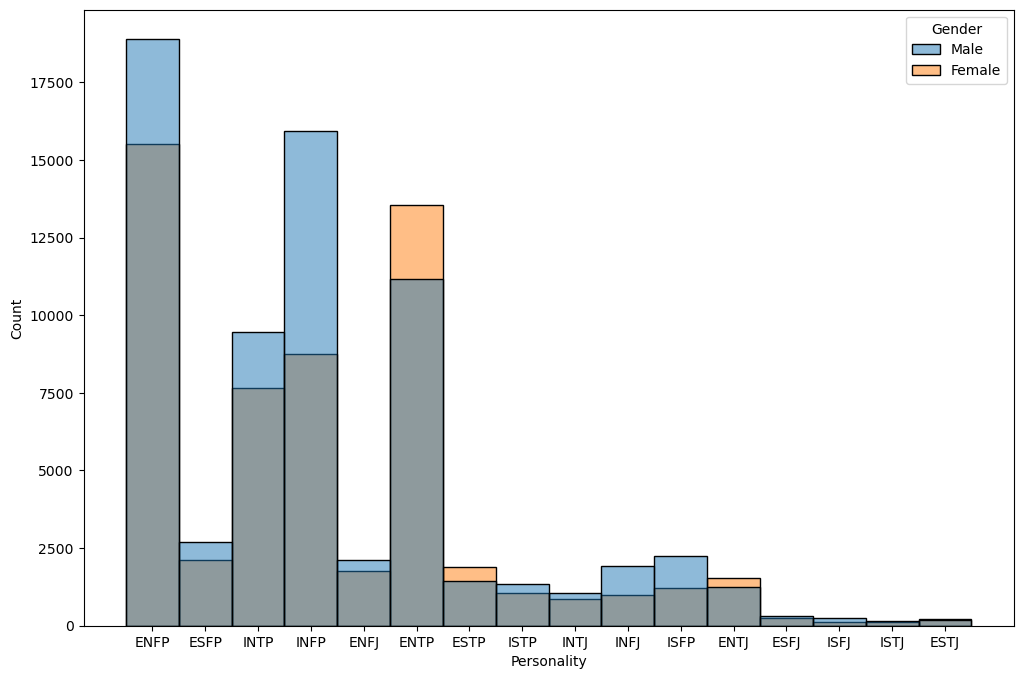

In [10]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x="Personality", hue="Gender")

In [11]:
df.columns

Index(['Age', 'Gender', 'Education', 'Introversion Score', 'Sensing Score',
       'Thinking Score', 'Judging Score', 'Interest', 'Personality'],
      dtype='object')

In [12]:
personalities = df[['Introversion Score', 'Sensing Score',
       'Thinking Score', 'Judging Score', 'Personality']].groupby("Personality").mean()
personalities

,Introversion Score,Sensing Score,Thinking Score,Judging Score
Personality,,,,
ENFJ,7.004616,4.841593,2.950930,6.397035
ENFP,7.010038,4.854324,2.939706,4.373549
ENTJ,6.971154,4.844240,7.878246,6.410599
ENTP,6.968431,4.863513,7.861365,4.367352
ESFJ,7.031451,6.656928,2.803107,6.470169
ESFP,7.025034,6.708731,2.952078,4.349461
ESTJ,7.119486,6.738344,7.888053,6.420271
ESTP,6.995538,6.694580,7.790451,4.363636
INFJ,2.213627,4.882983,2.998510,6.417193


<Axes: xlabel='Personality'>

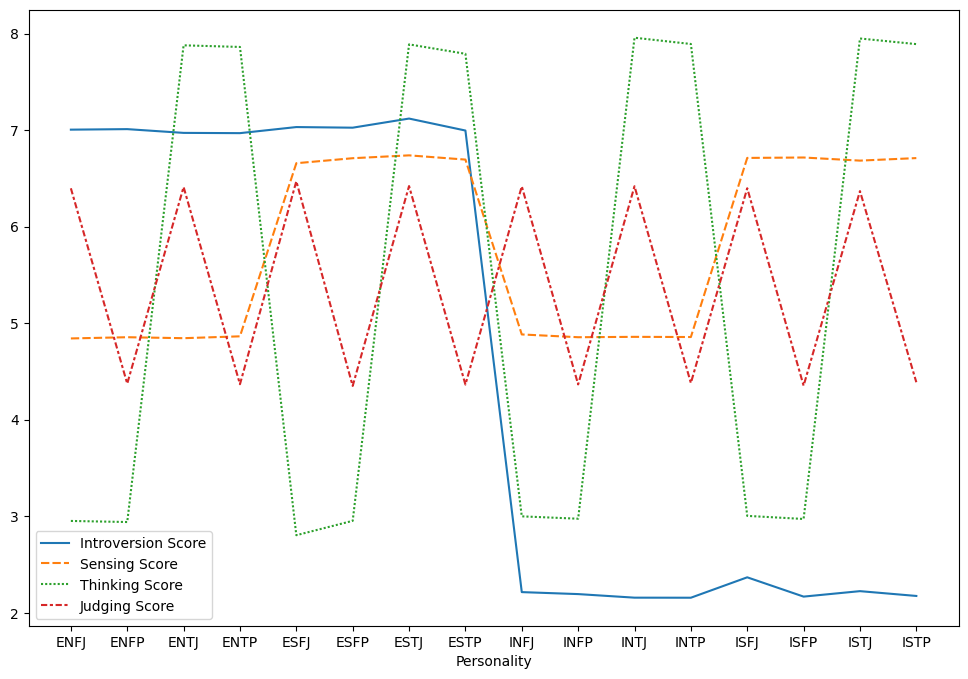

In [13]:
plt.figure(figsize=(12,8))
sns.lineplot(data=personalities)

<Axes: >

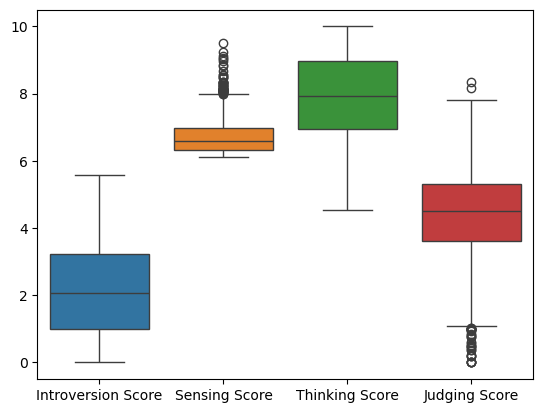

In [14]:
x = "ISTP"

sns.boxplot(data=df[df["Personality"]==x][['Introversion Score', 'Sensing Score', 'Thinking Score', 'Judging Score']])

#   ML modelling

In [15]:
#   prepare dataframe

In [16]:
metrics = df[['Introversion Score', 'Sensing Score',
       'Thinking Score', 'Judging Score']]
types = df.Personality
types.unique()

OLDIES = []
def changer(x):
       if x not in OLDIES:
              OLDIES.append(x)
              return OLDIES.index(x)
       elif x in OLDIES:
              return OLDIES.index(x)

types = df.Personality.apply(changer)
types.unique()

print(df.Personality.unique())
personality_types = {}
for i in types.unique():
       personality_types.update({i: df.Personality.unique()[i]})
print(personality_types)

['ENFP' 'ESFP' 'INTP' 'INFP' 'ENFJ' 'ENTP' 'ESTP' 'ISTP' 'INTJ' 'INFJ'
 'ISFP' 'ENTJ' 'ESFJ' 'ISFJ' 'ISTJ' 'ESTJ']
{0: 'ENFP', 1: 'ESFP', 2: 'INTP', 3: 'INFP', 4: 'ENFJ', 5: 'ENTP', 6: 'ESTP', 7: 'ISTP', 8: 'INTJ', 9: 'INFJ', 10: 'ISFP', 11: 'ENTJ', 12: 'ESFJ', 13: 'ISFJ', 14: 'ISTJ', 15: 'ESTJ'}


In [17]:
print(metrics.shape)
types.shape

(128061, 4)


(128061,)

In [18]:
#   Plan:

#   FOR model: fit, pred, print accuracy, confusion, report, 

#   logReg
#   knn
#   decisiontree
#   randomforrest
#   svm
#   stadardscaler  !! here would not use it.. so skip the step
#   pca + svm
#   kmean

#   COMPARISON

#   grid (hyperparam. tunning)

In [19]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [20]:
X_train, X_test, y_train, y_test = train_test_split(metrics, types, test_size=0.33, random_state=42)

Accuracy of KNeighborsClassifier(): 
0.7024679964979532

confusion Matrix of KNeighborsClassifier()

Classification_report of KNeighborsClassifier(): 
              precision    recall  f1-score   support

           0       0.76      0.82      0.79     11404
           1       0.48      0.51      0.50      1565
           2       0.72      0.76      0.74      5658
           3       0.75      0.76      0.76      8123
           4       0.47      0.38      0.42      1294
           5       0.77      0.76      0.76      8231
           6       0.48      0.46      0.47      1077
           7       0.49      0.44      0.46       761
           8       0.42      0.32      0.36       623
           9       0.48      0.35      0.41      1030
          10       0.50      0.46      0.48      1093
          11       0.48      0.36      0.41       897
          12       0.30      0.20      0.24       179
          13       0.32      0.15      0.21       119
          14       0.22      0.14     

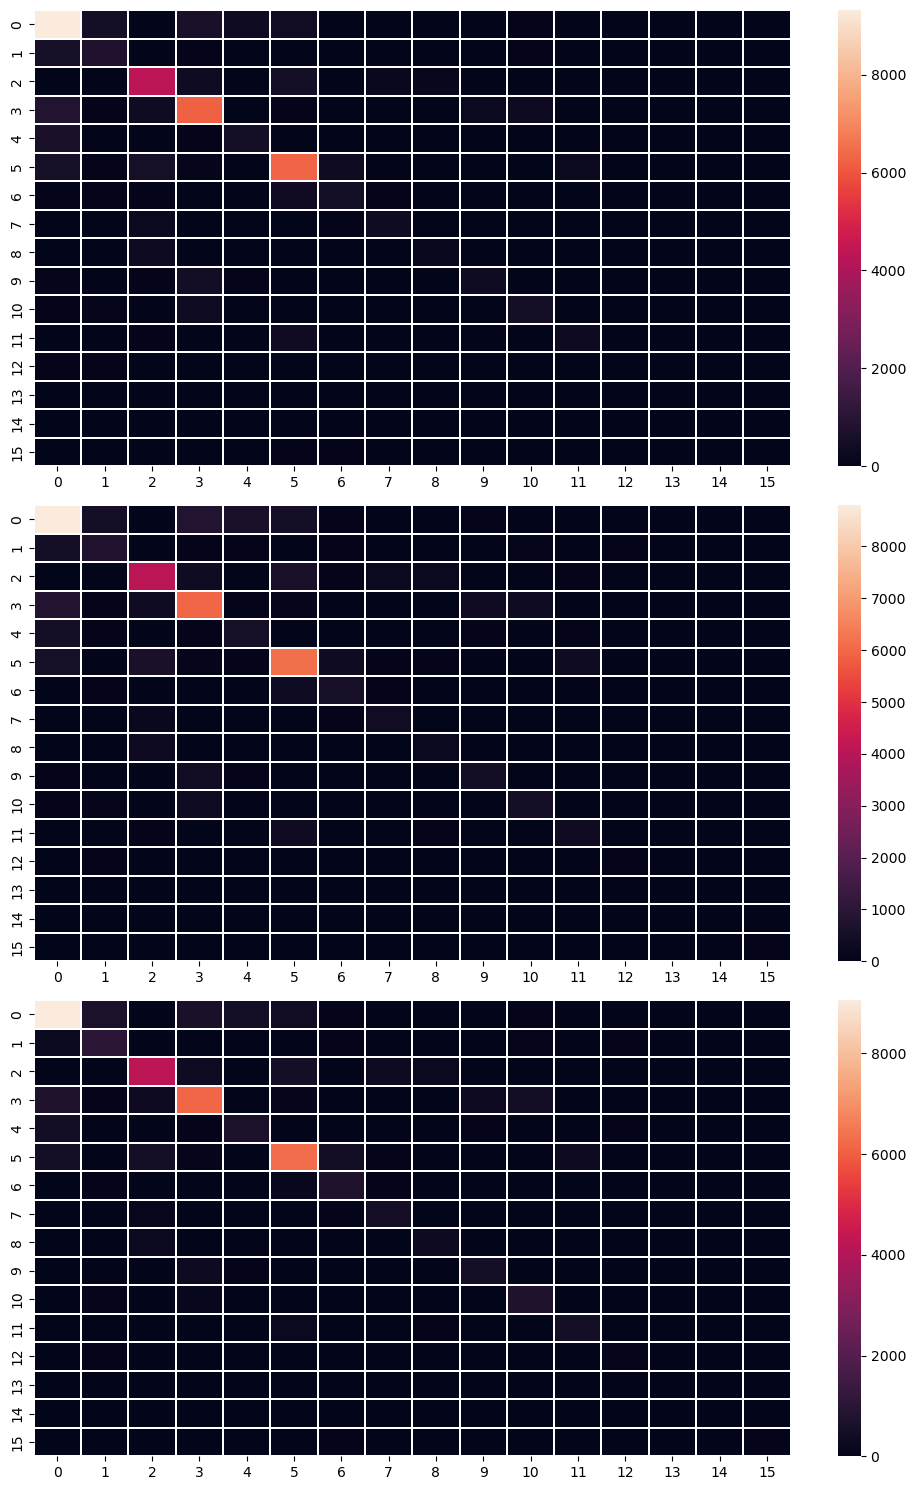

In [21]:

models = [KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier()]

f, axes = plt.subplots(3,1,sharey=True, figsize=(10,15))

for ax, model in zip(axes, models):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    print(f"Accuracy of {model}: \n{accuracy_score(y_test, predictions)}\n")
    sns.heatmap(confusion_matrix(y_test, predictions), ax=ax, fmt=".2g", linewidths=0.2)
    plt.ylabel(print(f"confusion Matrix of {model}"))
    print(f"\nClassification_report of {model}: \n{classification_report(y_test, predictions)}\n")

plt.tight_layout()
plt.show()

c:\Users\V. Stasiunaitis\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\V. Stasiunaitis\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

Accuracy of LogisticRegressionCV(): 
0.6836326636851944

confusion Matrix of LogisticRegressionCV()

Classification_report of LogisticRegressionCV(): 
              precision    recall  f1-score   support

           0       0.70      0.89      0.78     11404
           1       0.00      0.00      0.00      1565
           2       0.67      0.83      0.74      5658
           3       0.67      0.86      0.75      8123
           4       0.00      0.00      0.00      1294
           5       0.68      0.86      0.76      8231
           6       0.00      0.00      0.00      1077
           7       0.00      0.00      0.00       761
           8       0.00      0.00      0.00       623
           9       0.00      0.00      0.00      1030
          10       0.00      0.00      0.00      1093
          11       0.00      0.00      0.00       897
          12       0.00      0.00      0.00       179
          13       0.00      0.00      0.00       119
          14       0.00      0.00     

c:\Users\V. Stasiunaitis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\V. Stasiunaitis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\V. Stasiunaitis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\V

Accuracy of SVC(max_iter=100): 
0.14209318283997066

confusion Matrix of SVC(max_iter=100)

Classification_report of SVC(max_iter=100): 
              precision    recall  f1-score   support

           0       0.57      0.27      0.37     11404
           1       0.08      0.14      0.10      1565
           2       0.47      0.10      0.16      5658
           3       0.42      0.09      0.15      8123
           4       0.10      0.09      0.09      1294
           5       0.58      0.04      0.08      8231
           6       0.05      0.09      0.06      1077
           7       0.06      0.10      0.07       761
           8       0.07      0.10      0.08       623
           9       0.07      0.23      0.11      1030
          10       0.06      0.07      0.06      1093
          11       0.05      0.14      0.07       897
          12       0.01      0.28      0.02       179
          13       0.01      0.37      0.02       119
          14       0.01      0.35      0.02        7

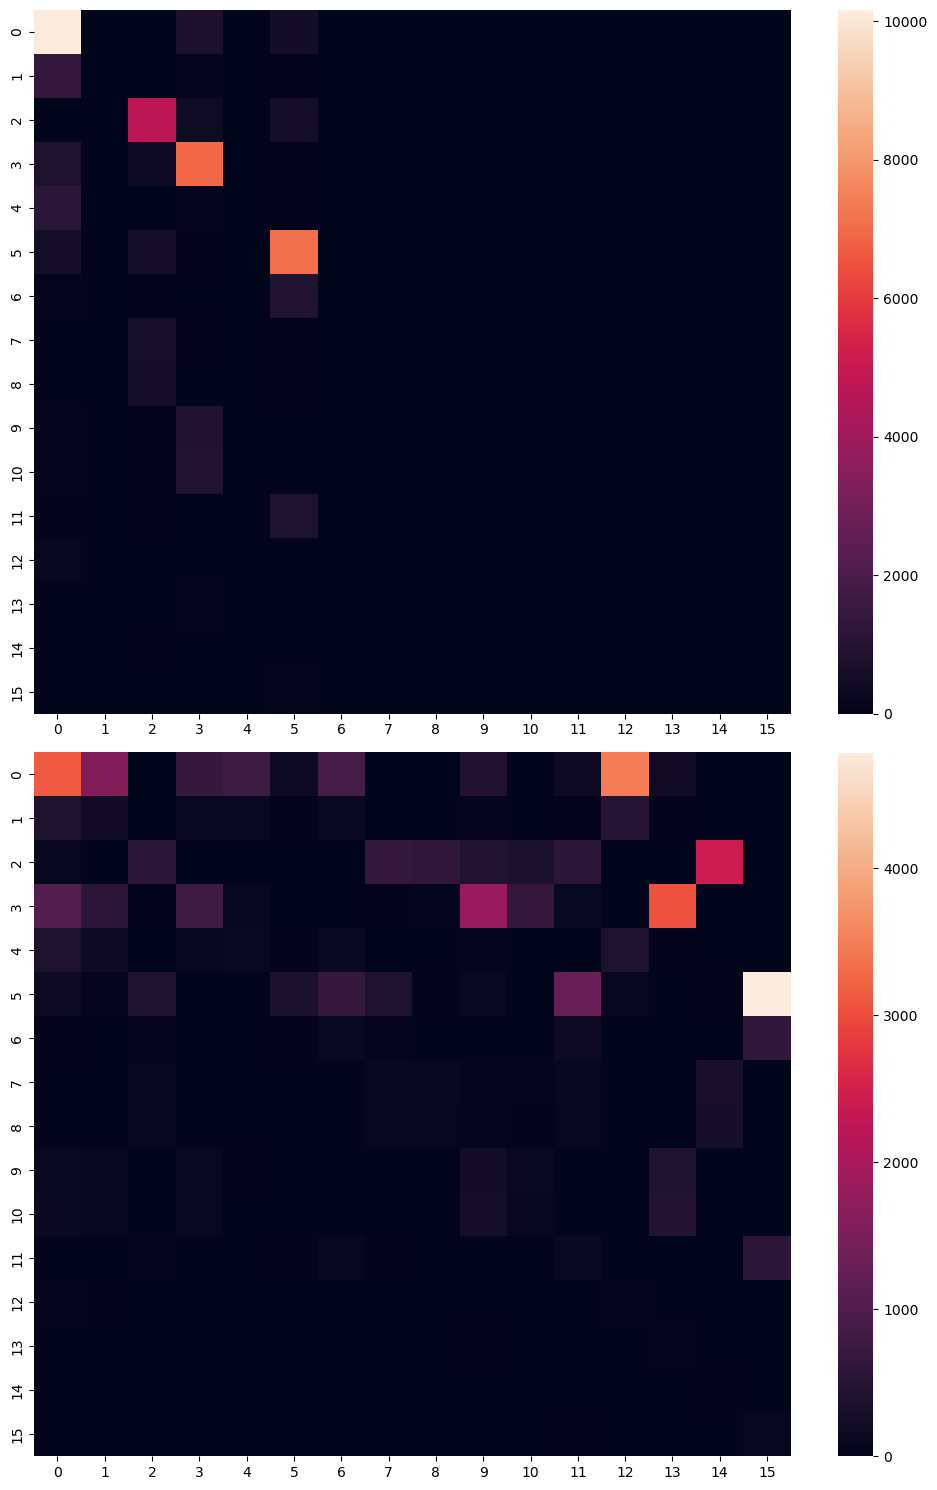

In [22]:
after_pca = [LogisticRegressionCV(max_iter=100), SVC(max_iter=100)]

pca = PCA(n_components=2)
pcaed_X = pca.fit_transform(metrics)

X_train, X_test, y_train, y_test = train_test_split(pcaed_X, types, test_size=0.33, random_state=42)

f, axes = plt.subplots(2,1, figsize=(10,15))

for ax, model in zip(axes, after_pca):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    print(f"Accuracy of {model}: \n{accuracy_score(y_test, predictions)}\n")
    sns.heatmap(confusion_matrix(y_test, predictions), ax=ax, fmt=".2g")
    plt.ylabel(print(f"confusion Matrix of {model}"))
    print(f"\nClassification_report of {model}: \n{classification_report(y_test, predictions)}\n")

plt.tight_layout()
plt.show()

In [23]:
#   VERY VERY SLOW

pg = {"C": [0.1, 1, 10, 100], "gamma": [1, 0.1, 0.01, 0.001]}
#grid = GridSearchCV(SVC(), pg, refit = True, verbose=2)
#grid.fit(X_train, y_train)


#grid.best_params_

Accuracy of KMeans(n_clusters=16): 
0.0487683679988642

confusion Matrix of KMeans(n_clusters=16)


Classification_report of KMeans(n_clusters=16): 
              precision    recall  f1-score   support

           0       0.26      0.06      0.10     11404
           1       0.04      0.07      0.05      1565
           2       0.00      0.00      0.00      5658
           3       0.24      0.08      0.12      8123
           4       0.03      0.06      0.04      1294
           5       0.02      0.01      0.01      8231
           6       0.00      0.00      0.00      1077
           7       0.10      0.36      0.16       761
           8       0.00      0.00      0.00       623
           9       0.00      0.00      0.00      1030
          10       0.10      0.24      0.14      1093
          11       0.00      0.00      0.00       897
          12       0.00      0.00      0.00       179
          13       0.01      0.13      0.01       119
          14       0.00      0.00      0

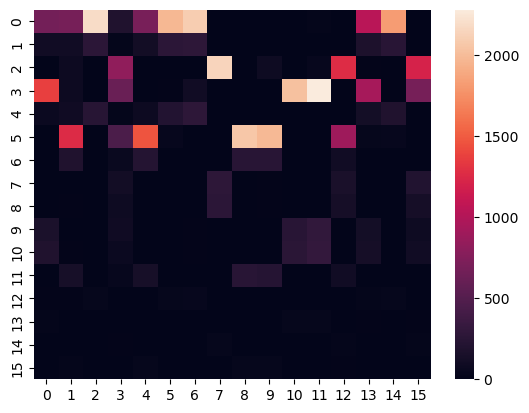

In [32]:
#   kmeans after pca
pca = PCA(n_components=2)
pcaed_X = pca.fit_transform(metrics)

X_train, X_test, y_train, y_test = train_test_split(pcaed_X, types, test_size=0.33, random_state=42)

model = KMeans(n_clusters=16)
model.fit(X_train)

predictions = model.predict(X_test)



print(f"Accuracy of {model}: \n{accuracy_score(y_test, predictions)}\n")
print(f"confusion Matrix of {model}\n")
sns.heatmap(confusion_matrix(y_test, predictions), fmt=".2g")
print(f"\nClassification_report of {model}: \n{classification_report(y_test, predictions)}\n")

Accuracy of KMeans(n_clusters=16): 
0.01606682283902416

confusion Matrix of KMeans(n_clusters=16)


Classification_report of KMeans(n_clusters=16): 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     11404
           1       0.09      0.17      0.12      1565
           2       0.00      0.00      0.00      5658
           3       0.00      0.00      0.00      8123
           4       0.01      0.03      0.02      1294
           5       0.00      0.00      0.00      8231
           6       0.00      0.00      0.00      1077
           7       0.00      0.00      0.00       761
           8       0.00      0.00      0.00       623
           9       0.00      0.00      0.00      1030
          10       0.00      0.00      0.00      1093
          11       0.12      0.42      0.19       897
          12       0.00      0.00      0.00       179
          13       0.00      0.00      0.00       119
          14       0.00      0.00      

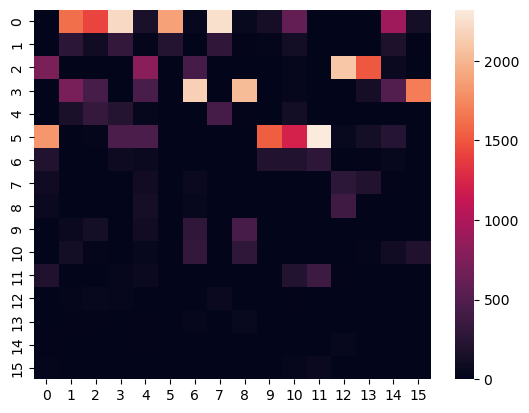

In [33]:
#   kmeans without pca

X_train, X_test, y_train, y_test = train_test_split(metrics, types, test_size=0.33, random_state=42)

model = KMeans(n_clusters=16)
model.fit(X_train)

predictions = model.predict(X_test)


print(f"Accuracy of {model}: \n{accuracy_score(y_test, predictions)}\n")
print(f"confusion Matrix of {model}\n")
sns.heatmap(confusion_matrix(y_test, predictions), fmt=".2g")
print(f"\nClassification_report of {model}: \n{classification_report(y_test, predictions)}\n")

Accuracy of RandomForestClassifier(): 
0.6530134166252574

confusion Matrix of RandomForestClassifier()


Classification_report of RandomForestClassifier(): 
              precision    recall  f1-score   support

           0       0.69      0.85      0.77     11404
           1       0.08      0.02      0.03      1565
           2       0.66      0.78      0.72      5658
           3       0.67      0.81      0.73      8123
           4       0.07      0.01      0.02      1294
           5       0.69      0.81      0.74      8231
           6       0.07      0.02      0.03      1077
           7       0.08      0.02      0.03       761
           8       0.04      0.01      0.02       623
           9       0.09      0.02      0.03      1030
          10       0.08      0.02      0.04      1093
          11       0.08      0.02      0.03       897
          12       0.03      0.01      0.01       179
          13       0.00      0.00      0.00       119
          14       0.00      0.

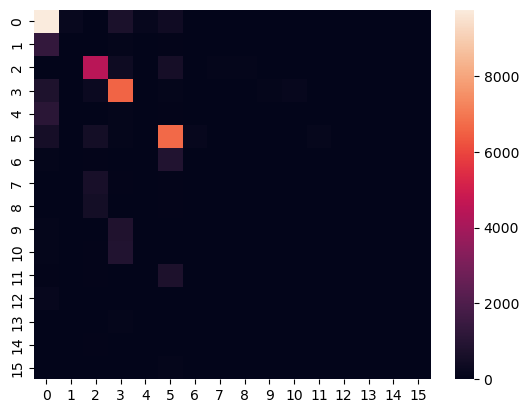

In [34]:
#   rfc after pca
pca = PCA(n_components=2)
pcaed_X = pca.fit_transform(metrics)

X_train, X_test, y_train, y_test = train_test_split(pcaed_X, types, test_size=0.33, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(f"Accuracy of {model}: \n{accuracy_score(y_test, predictions)}\n")
print(f"confusion Matrix of {model}\n")
sns.heatmap(confusion_matrix(y_test, predictions), fmt=".2g")
print(f"\nClassification_report of {model}: \n{classification_report(y_test, predictions)}\n")

Accuracy of RandomForestClassifier(): 
0.7288279974444524

confusion Matrix of RandomForestClassifier()


Classification_report of RandomForestClassifier(): 
              precision    recall  f1-score   support

           0       0.82      0.79      0.81     11404
           1       0.53      0.67      0.59      1565
           2       0.77      0.74      0.75      5658
           3       0.79      0.76      0.78      8123
           4       0.51      0.51      0.51      1294
           5       0.80      0.76      0.78      8231
           6       0.52      0.68      0.59      1077
           7       0.51      0.65      0.57       761
           8       0.46      0.46      0.46       623
           9       0.52      0.50      0.51      1030
          10       0.52      0.67      0.59      1093
          11       0.50      0.51      0.50       897
          12       0.40      0.54      0.46       179
          13       0.28      0.29      0.29       119
          14       0.27      0.

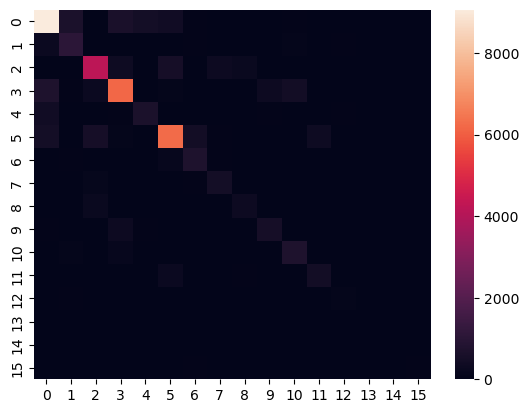

In [35]:
#   rfc without pca

X_train, X_test, y_train, y_test = train_test_split(metrics, types, test_size=0.33, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(f"Accuracy of {model}: \n{accuracy_score(y_test, predictions)}\n")
print(f"confusion Matrix of {model}\n")
sns.heatmap(confusion_matrix(y_test, predictions), fmt=".2g")
print(f"\nClassification_report of {model}: \n{classification_report(y_test, predictions)}\n")

In [ ]:
#   so far best result. Could be now hyper - tested with grid.. for time reasons moving on